# I UPLOADING and Encoding DATAFRAME

In [16]:
# Importing the basic libraries we will require for the project

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

from sklearn.impute import SimpleImputer

## 1. Upload the CSV

In [3]:
csv_name = 'Surveydata_train.csv'

starting_df = pd.read_csv(csv_name)
starting_df.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


## 2. Check the info of this DF

In [4]:
starting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

there are only object --> categories --> let's look at their values

In [5]:
starting_df.columns

Index(['ID', 'Overall_Experience', 'Seat_Comfort', 'Seat_Class',
       'Arrival_Time_Convenient', 'Catering', 'Platform_Location',
       'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
       'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom',
       'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding'],
      dtype='object')

## 3. Check the OBJECT Categories to see the possible values

In [6]:
# Making a list of all catrgorical variables 
cat_col=['Seat_Comfort', 'Seat_Class',
       'Arrival_Time_Convenient', 'Catering', 'Platform_Location',
       'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
       'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom',
       'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding']

# Printing number of count of each unique value in each column
for column in cat_col:
    print(starting_df[column].value_counts())
    print('-'*50)

Acceptable           21158
Needs Improvement    20946
Good                 20595
Poor                 15185
Excellent            12971
Extremely Poor        3463
Name: Seat_Comfort, dtype: int64
--------------------------------------------------
Green Car    47435
Ordinary     46944
Name: Seat_Class, dtype: int64
--------------------------------------------------
Good                 19574
Excellent            17684
Acceptable           15177
Needs Improvement    14990
Poor                 13692
Extremely Poor        4332
Name: Arrival_Time_Convenient, dtype: int64
--------------------------------------------------
Acceptable           18468
Needs Improvement    17978
Good                 17969
Poor                 13858
Excellent            13455
Extremely Poor        3910
Name: Catering, dtype: int64
--------------------------------------------------
Manageable           24173
Convenient           21912
Needs Improvement    17832
Inconvenient         16449
Very Convenient      13981


## 4. Percentage of Missing Value

In [7]:
pd.DataFrame(data={'% of Missing Values':round(starting_df.isna().sum()/starting_df.isna().count()*100,2)}).sort_values(by='% of Missing Values',ascending=False)

,% of Missing Values
Arrival_Time_Convenient,9.46
Catering,9.26
Onboard_Service,8.05
Baggage_Handling,0.15
Online_Support,0.10
Legroom,0.10
CheckIn_Service,0.08
Ease_of_Online_Booking,0.08
Seat_Comfort,0.06
Platform_Location,0.03


- The ID as also possible to see above do not have NaN values.
- There are many missing values so it is necessary to make a Proper Imputation. 
- Now the data will be firstly Encoded and then the Outliers will be removed.

In [8]:
def Ordinal_encoding_Survey(element_i):
    mapping =  {'Extremely Poor': 0, 'Poor': 1, 'Needs Improvement': 2, 'Acceptable':3, 'Good':4, 'Excellent':5,
                'Very Inconvenient': 0, 'Inconvenient': 1, 'Needs Improvement': 2, 'Manageable':3, 'Convenient':4, 'Very Convenient':5,
                'Green Car':1, 'Ordinary':0}

    try:
        data = mapping[element_i]
        return data
    except:
        return np.NaN
    
def cleaning_Survey(csv_name):
    shin_exp = pd.read_csv(csv_name)
    almost_all_columns = ['Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering',
       'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment',
       'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service',
       'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding']

    for column_i in almost_all_columns:
        shin_exp[column_i] = shin_exp[column_i].apply(Ordinal_encoding_Survey)

    #print(shin_exp.isna().sum())

    return shin_exp


## 5. Here the Encoding for Later Removal of Outliers 

### And Encoding of Survey_Test

In [9]:
# Here the Encoding for Later Removal of Outliers 
csv_name = 'Surveydata_train.csv'
encoded_df = cleaning_Survey(csv_name)



## A. Same Process for the Travel one

In [17]:
csv_name3 = 'Traveldata_train.csv'

starting_df3 = pd.read_csv(csv_name3)
starting_df3.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


## B. check the info of the DataFrame

In [18]:
starting_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


In [19]:
starting_df3.columns

Index(['ID', 'Gender', 'Customer_Type', 'Age', 'Type_Travel', 'Travel_Class',
       'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins'],
      dtype='object')

## C. check the info for each CATERGORIES OBJECT

In [20]:
# Making a list of all catrgorical variables 
cat_col=[ 'Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class']

# Printing number of count of each unique value in each column
for column in cat_col:
    print(starting_df3[column].value_counts())
    print('-'*50)

Female    47815
Male      46487
Name: Gender, dtype: int64
--------------------------------------------------
Loyal Customer       69823
Disloyal Customer    15605
Name: Customer_Type, dtype: int64
--------------------------------------------------
Business Travel    58617
Personal Travel    26536
Name: Type_Travel, dtype: int64
--------------------------------------------------
Eco         49342
Business    45037
Name: Travel_Class, dtype: int64
--------------------------------------------------


## D. Percentage of Missing Value

In [21]:
pd.DataFrame(data={'% of Missing Values':round(starting_df3.isna().sum()/starting_df3.isna().count()*100,2)}).sort_values(by='% of Missing Values',ascending=False)

,% of Missing Values
Type_Travel,9.78
Customer_Type,9.48
Arrival_Delay_in_Mins,0.38
Gender,0.08
Departure_Delay_in_Mins,0.06
Age,0.03
ID,0.00
Travel_Class,0.00
Travel_Distance,0.00


- The ID as also possible to see above do not have NaN values.
- There are many missing values so it is necessary to make a Proper Imputation. 
- Now the data will be firstly Encoded and then the Outliers will be removed.

## E. Here the Encoding for Later Removal of Outliers 

### And Encoding of Survey_Test

In [22]:
def Ordinal_encoding_Travel(element_i):
    mapping =  {'Female': 0, 'Male': 1, 
                'Business Travel': 0, 'Personal Travel': 1, 
                'Disloyal Customer': 0, 'Loyal Customer': 1, 
                'Business':0, 'Eco':1}

    try:
        data = mapping[element_i]
        return data
    except:
        return np.NaN
    
def cleaning_Travel(csv_name):
    shin_exp = pd.read_csv(csv_name)
    almost_all_columns = ['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class']

    for column_i in almost_all_columns:
        shin_exp[column_i] = shin_exp[column_i].apply(Ordinal_encoding_Travel)

    #print(shin_exp.isna().sum())

    return shin_exp

In [23]:
csv_name3 = 'Traveldata_train.csv'
encoded_df3 = cleaning_Travel(csv_name3)



# II NOW Merging 2 DataFrame and REMOVAL of Outliers

## Upload initial csv and then ENCODE the Categories

In [24]:
# Here the Encoding for Later Removal of Outliers 
csv_name = 'Surveydata_train.csv'
encoded_df1 = cleaning_Survey(csv_name)

csv_name3 = 'Traveldata_train.csv'
encoded_df3 = cleaning_Travel(csv_name3)


## Merge of the 2 Encoded Dataframe

In [25]:
complete_encoded_df = pd.merge(encoded_df1, encoded_df3, on = 'ID')
complete_encoded_df.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,0,2.0,1,5.0,5.0,5.0,4.0,2.0,3.0,...,2.0,1.0,0.0,1.0,52.0,NaN,0,272,0.0,5.0
1,98800002,0,1.0,0,5.0,1.0,2.0,4.0,1.0,4.0,...,4.0,4.0,1.0,1.0,48.0,1.0,1,2200,9.0,0.0
2,98800003,1,2.0,1,2.0,2.0,2.0,2.0,4.0,5.0,...,5.0,5.0,0.0,1.0,43.0,0.0,0,1061,77.0,119.0
3,98800004,0,3.0,0,2.0,NaN,2.0,3.0,2.0,3.0,...,3.0,3.0,0.0,1.0,44.0,0.0,0,780,13.0,18.0
4,98800005,1,3.0,0,3.0,3.0,3.0,2.0,4.0,5.0,...,4.0,4.0,0.0,1.0,50.0,0.0,0,1981,0.0,0.0


## Plotting the Histogram UNIVARIATE DISTRIBUTION OF ALL THE FEATURES

In [27]:
# Defining the hist_box() function
def hist_box(data,col):
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(10,6))
  # Adding a graph in each part
  sns.boxplot(x = data[col], ax=ax_box, showmeans=True)
  sns.distplot(data[col], ax=ax_hist)
  plt.show()

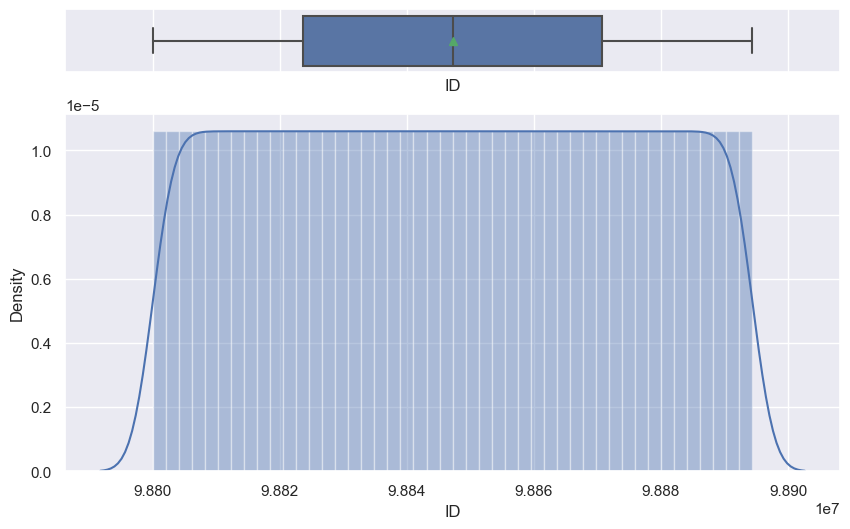

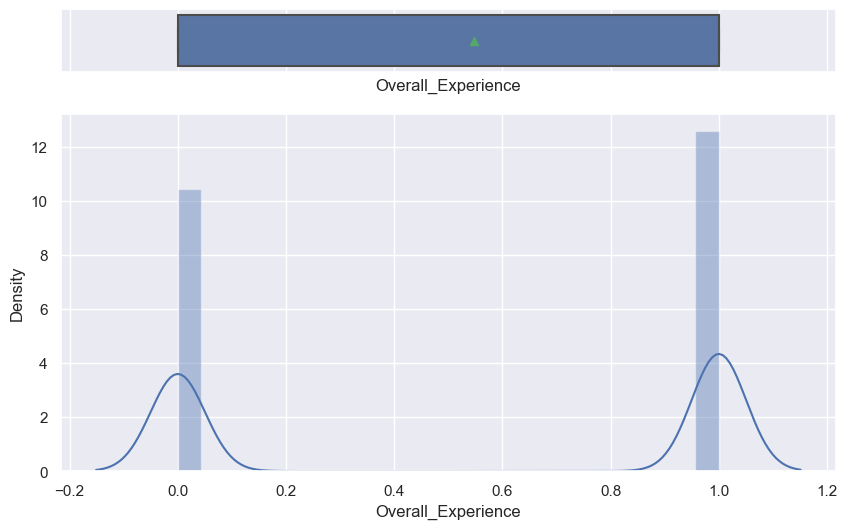

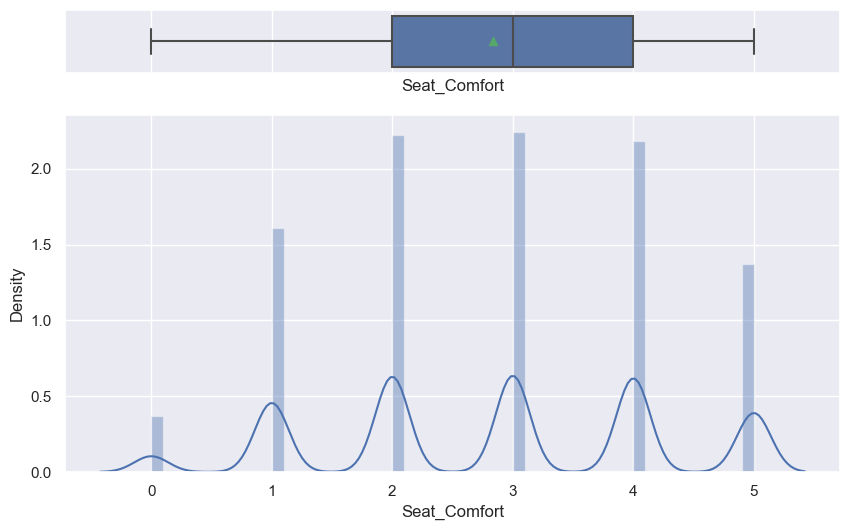

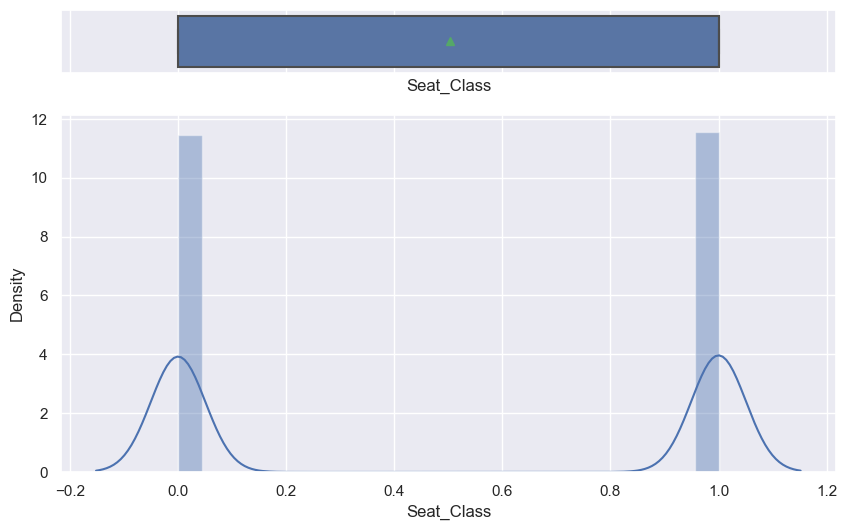

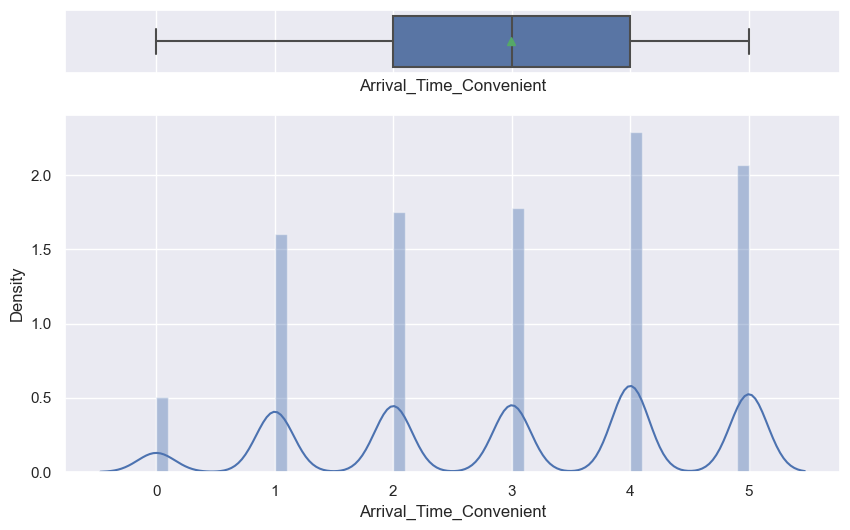

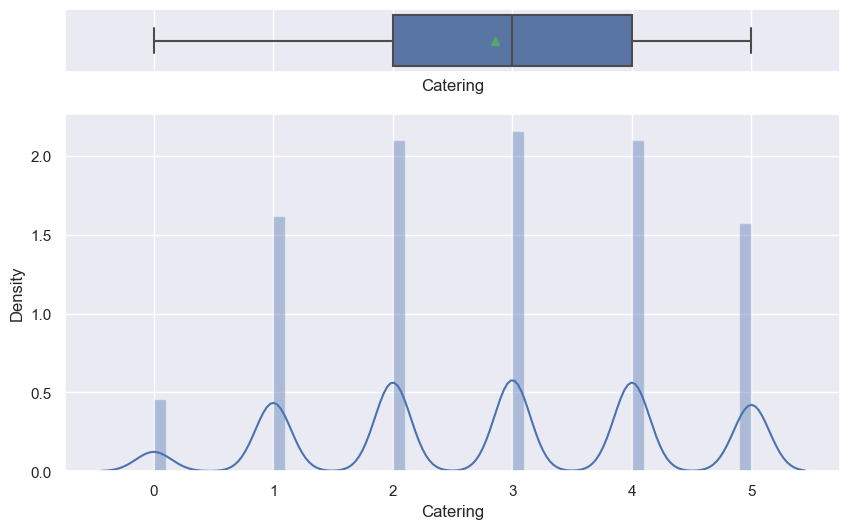

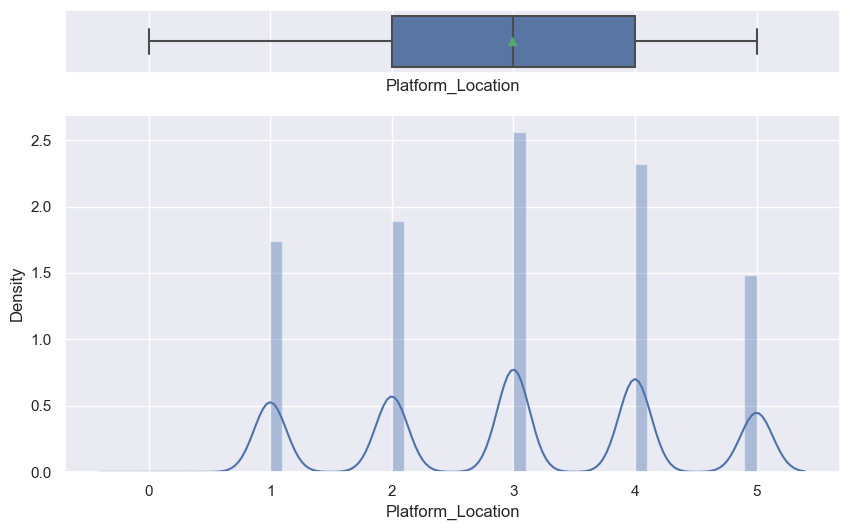

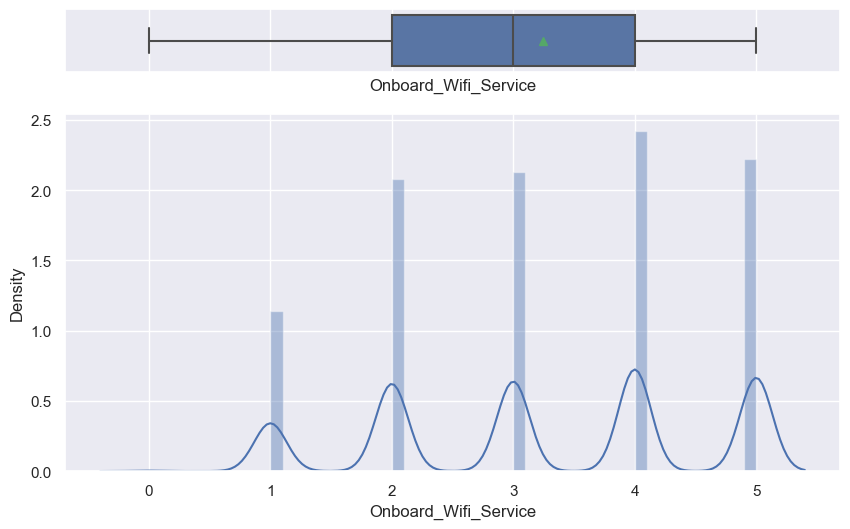

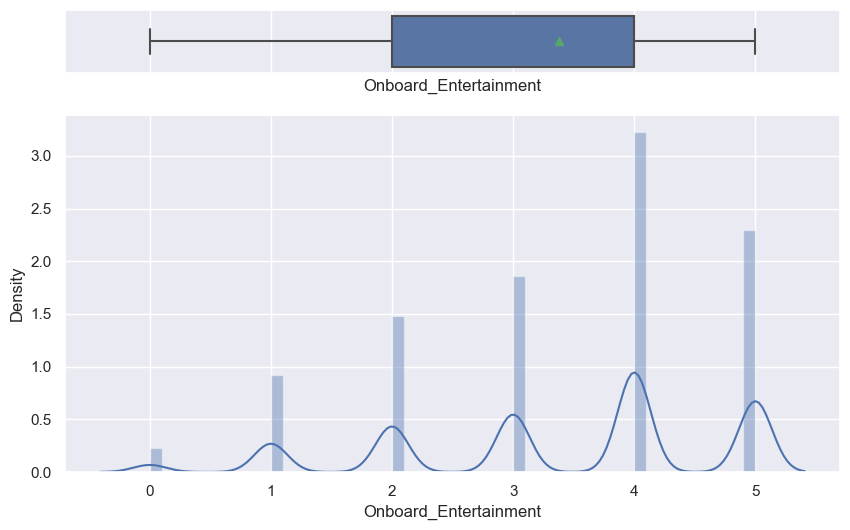

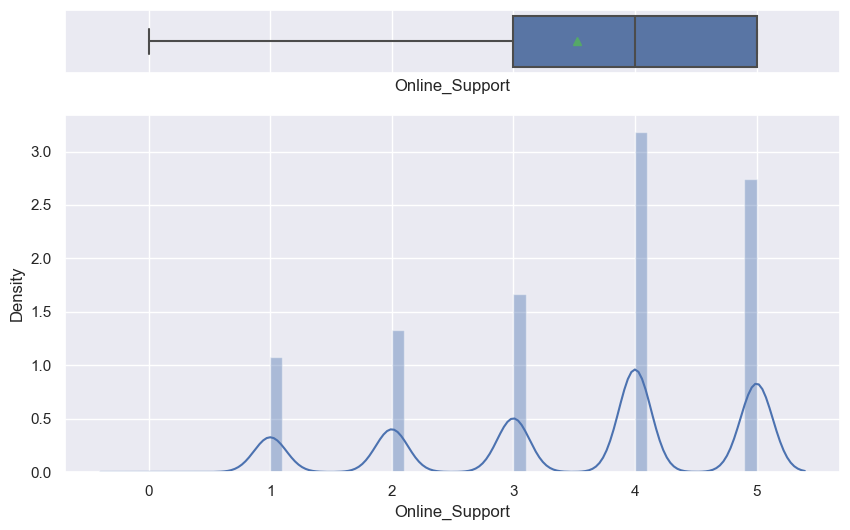

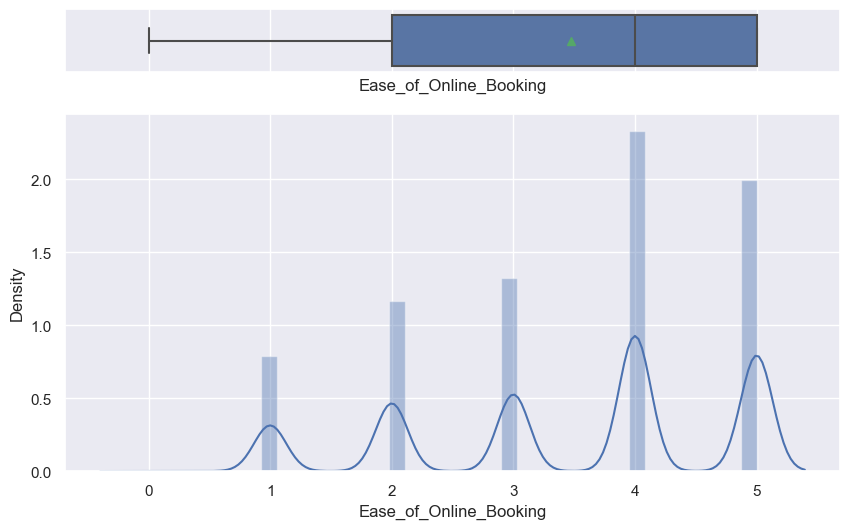

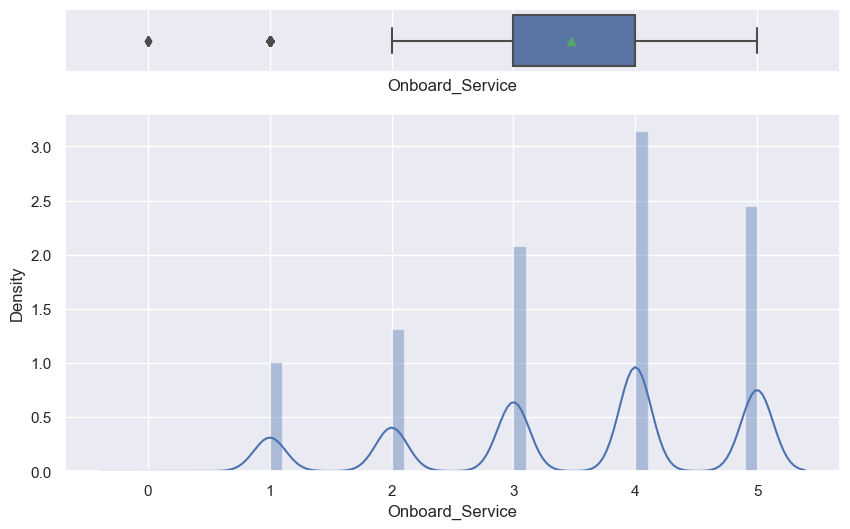

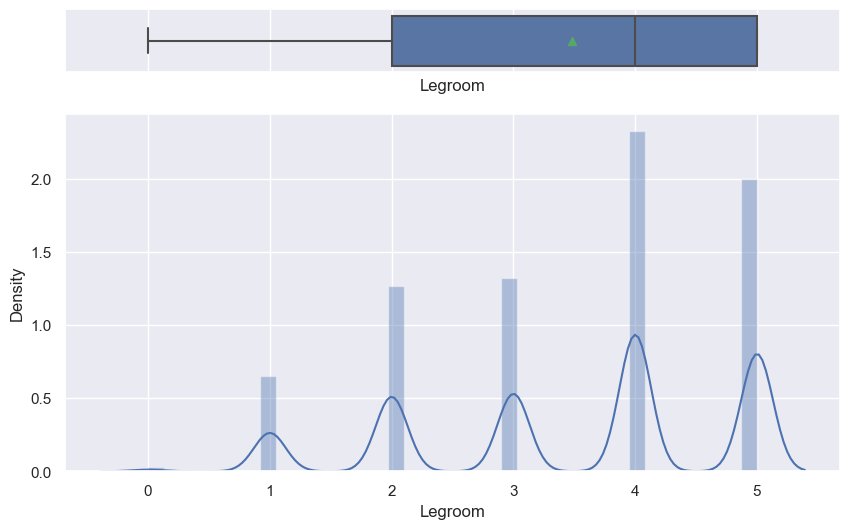

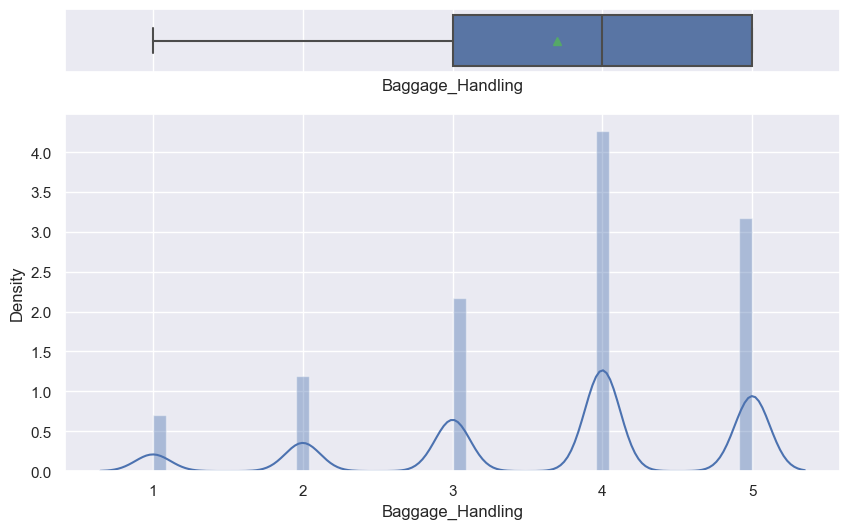

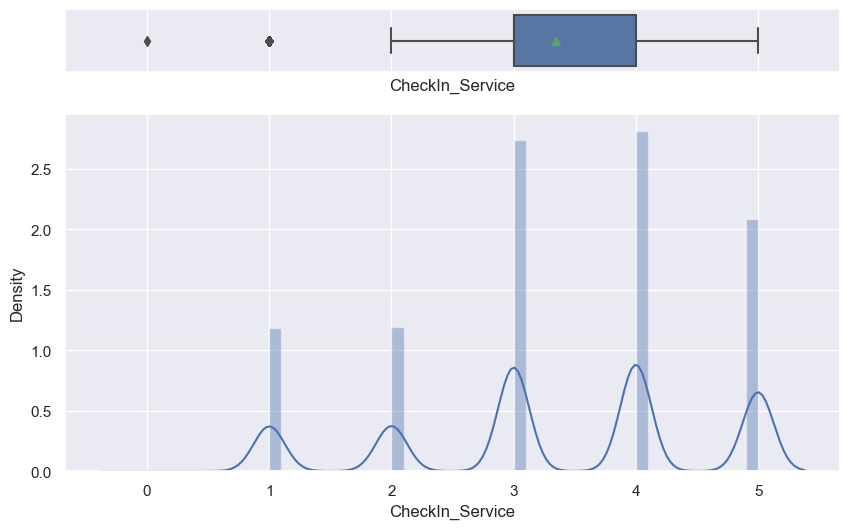

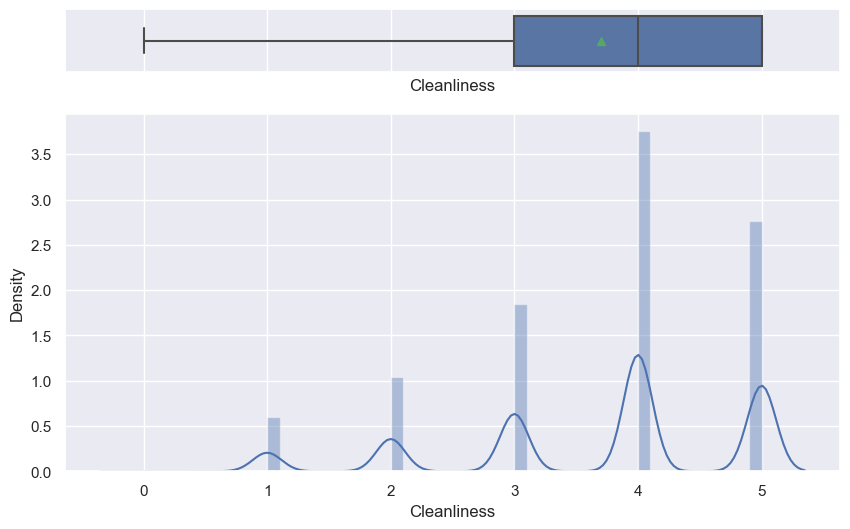

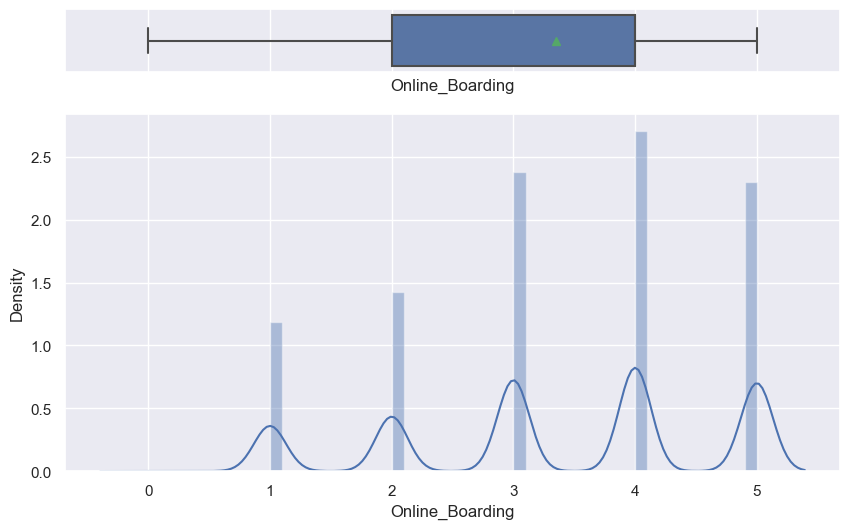

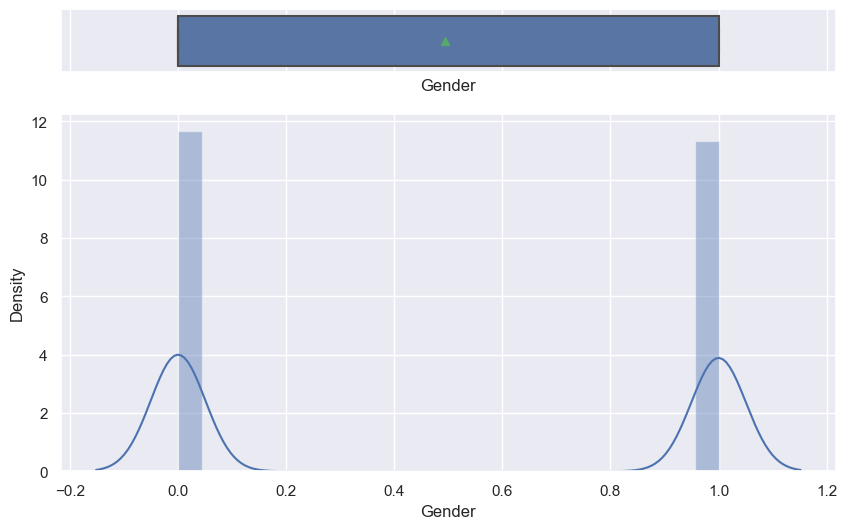

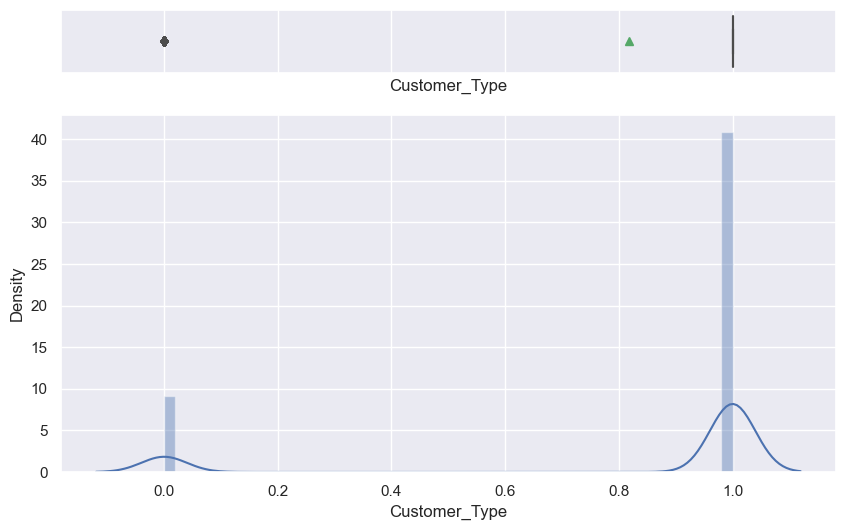

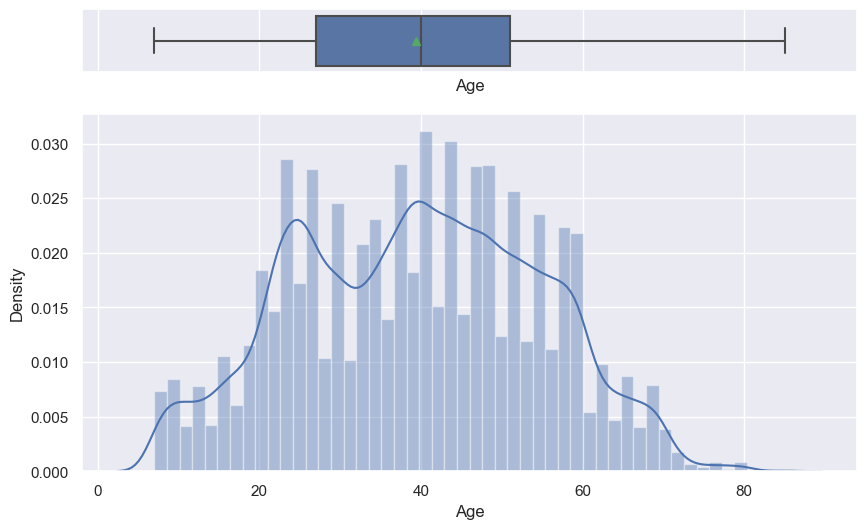

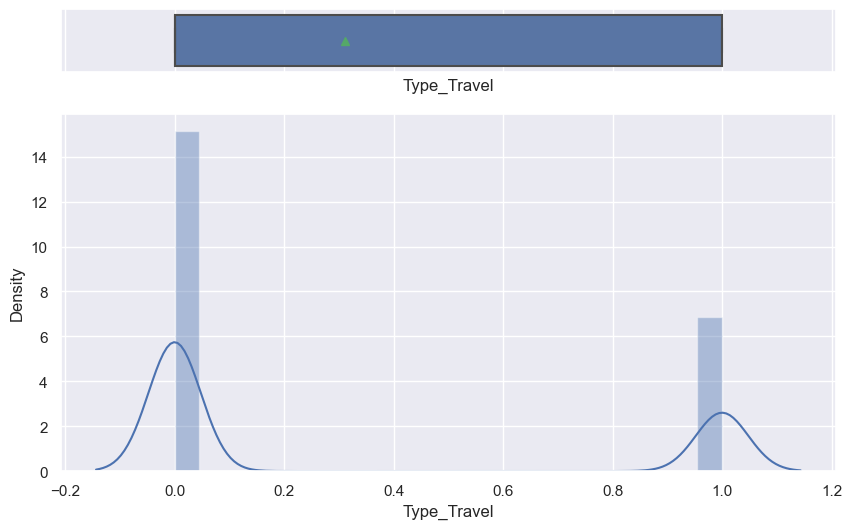

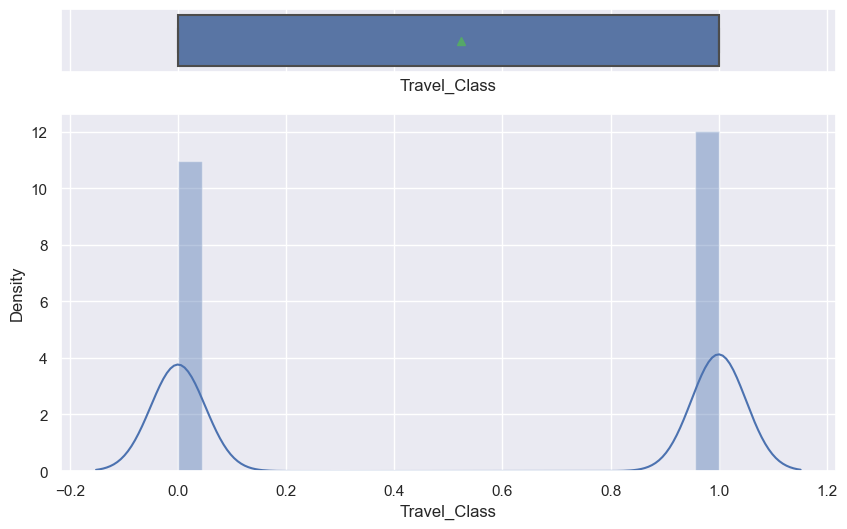

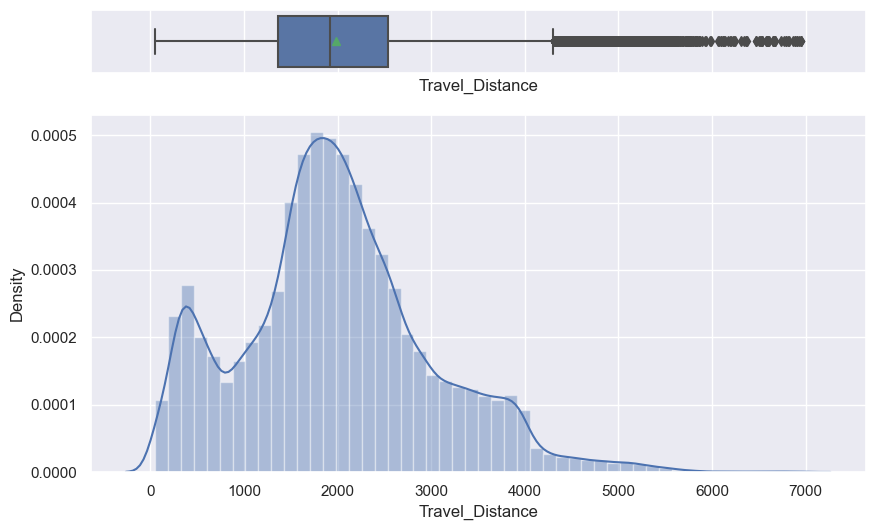

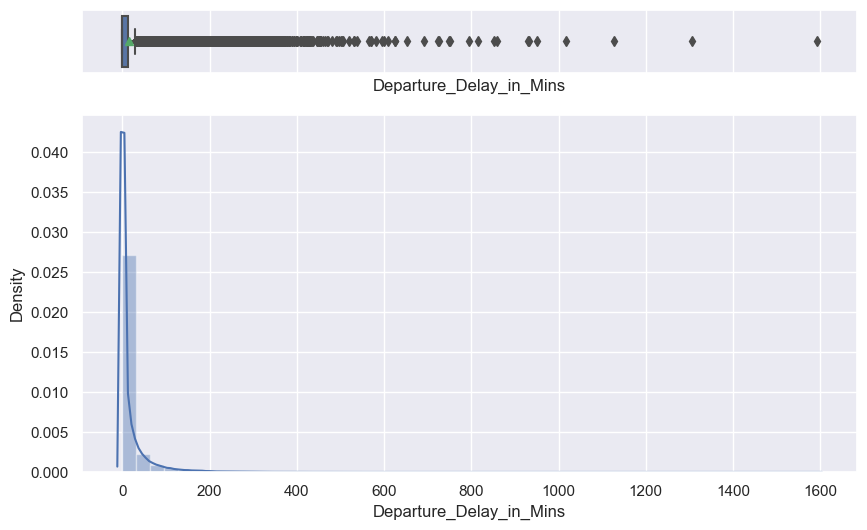

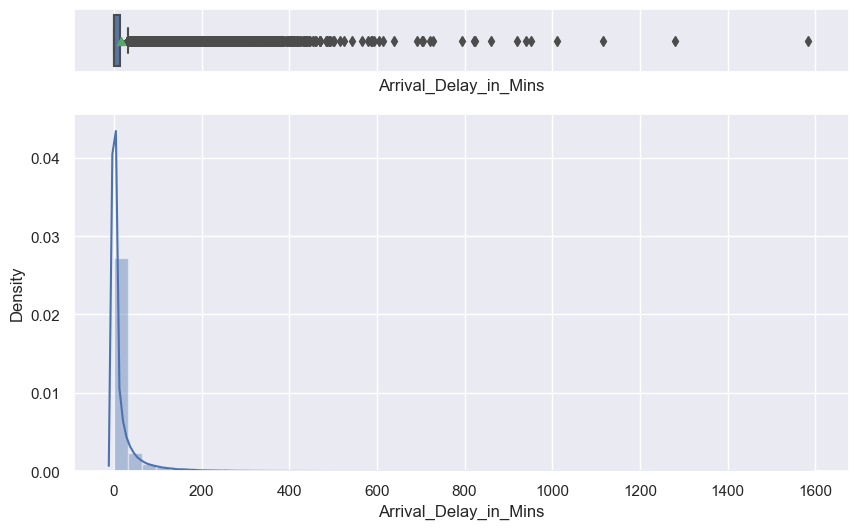

In [130]:
for col in complete_encoded_df.columns:
    hist_box(complete_encoded_df, col)
    #sns.countplot(encoded_df[ 'Seat_Class'])
    plt.show()

## REMOVAL OF OUTLIERS for the Different FEATURES

### The Categories who have OUTLIERS are:

In [31]:
complete_encoded_df[ complete_encoded_df['Onboard_Service'] < 1]

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
1102,98801103,0,2.0,0,5.0,5.0,5.0,4.0,4.0,4.0,...,0.0,3.0,0.0,1.0,49.0,0.0,0,3235,0.0,0.0
53065,98853066,0,2.0,1,NaN,3.0,3.0,1.0,2.0,2.0,...,0.0,1.0,1.0,1.0,43.0,0.0,0,4982,3.0,0.0
69790,98869791,0,2.0,0,5.0,NaN,5.0,4.0,4.0,3.0,...,0.0,3.0,1.0,1.0,50.0,0.0,0,4785,0.0,0.0
90054,98890055,0,3.0,0,4.0,4.0,4.0,1.0,3.0,3.0,...,0.0,2.0,0.0,1.0,66.0,0.0,0,5764,0.0,0.0


In [32]:
complete_encoded_df[ complete_encoded_df['CheckIn_Service'] < 1]#.index

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
6114,98806115,0,4.0,0,NaN,5.0,5.0,1.0,4.0,0.0,...,1.0,0.0,0.0,1.0,44.0,0.0,0,1940,200.0,233.0


In [33]:
col = 'Travel_Distance'
complete_encoded_df[ complete_encoded_df[col] >6000]#.head()#.index

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
539,98800540,0,1.0,1,1.0,1.0,3.0,1.0,3.0,3.0,...,2.0,3.0,1.0,1.0,35.0,1.0,1,6470,0.0,32.0
1999,98802000,0,2.0,0,2.0,2.0,3.0,2.0,4.0,4.0,...,2.0,4.0,1.0,0.0,8.0,0.0,1,6099,57.0,36.0
2248,98802249,1,1.0,0,1.0,1.0,1.0,4.0,4.0,4.0,...,3.0,4.0,1.0,1.0,46.0,0.0,0,6950,0.0,0.0
3481,98803482,0,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,...,3.0,1.0,1.0,1.0,30.0,NaN,1,6595,0.0,0.0
3602,98803603,1,5.0,0,5.0,5.0,5.0,2.0,2.0,2.0,...,5.0,2.0,1.0,1.0,42.0,0.0,0,6361,4.0,4.0
4217,98804218,1,4.0,0,4.0,5.0,4.0,4.0,4.0,4.0,...,5.0,4.0,1.0,1.0,43.0,0.0,0,6503,60.0,39.0
5285,98805286,0,2.0,1,1.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,1.0,1.0,19.0,0.0,0,6312,12.0,42.0
5910,98805911,1,5.0,1,4.0,5.0,5.0,5.0,1.0,5.0,...,5.0,5.0,0.0,1.0,50.0,0.0,0,6763,0.0,0.0
6803,98806804,0,3.0,1,5.0,3.0,5.0,3.0,1.0,4.0,...,4.0,4.0,0.0,1.0,52.0,1.0,1,6672,45.0,16.0
6839,98806840,1,5.0,0,5.0,5.0,5.0,5.0,4.0,4.0,...,4.0,4.0,1.0,1.0,44.0,0.0,0,6907,0.0,0.0


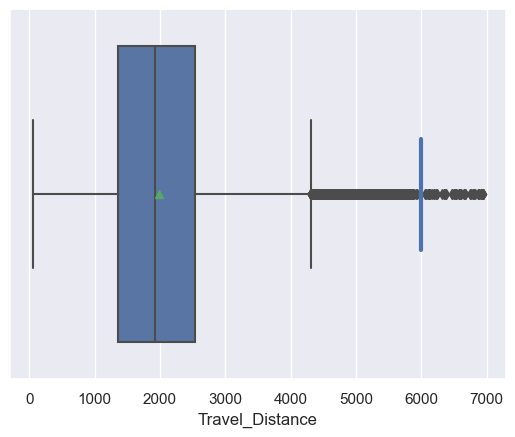

In [34]:
sns.boxplot(x = complete_encoded_df['Travel_Distance'] , showmeans=True, orient=90)
plt.plot([6000]*5, [-0.15,0,0.1,0.1,0.15], linewidth=3)
plt.show()

In [35]:
col = 'Departure_Delay_in_Mins' #500
complete_encoded_df[ complete_encoded_df[col] >550]#.head()#.index

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
4668,98804669,0,2.0,1,2.0,NaN,3.0,2.0,2.0,2.0,...,1.0,2.0,0.0,0.0,35.0,NaN,1,3907,569.0,543.0
6952,98806953,0,1.0,0,5.0,0.0,3.0,0.0,1.0,1.0,...,4.0,1.0,1.0,1.0,33.0,1.0,1,2832,726.0,691.0
7111,98807112,0,2.0,0,5.0,2.0,4.0,2.0,1.0,1.0,...,4.0,1.0,1.0,1.0,64.0,1.0,1,3794,570.0,567.0
7650,98807651,1,3.0,1,3.0,3.0,3.0,4.0,4.0,4.0,...,3.0,4.0,0.0,1.0,43.0,0.0,0,3882,624.0,615.0
12755,98812756,0,2.0,0,2.0,2.0,3.0,2.0,4.0,NaN,...,3.0,2.0,0.0,1.0,47.0,NaN,1,3113,1592.0,1584.0
22845,98822846,0,2.0,0,5.0,2.0,2.0,2.0,1.0,1.0,...,3.0,1.0,NaN,NaN,8.0,1.0,1,3017,1128.0,1115.0
26855,98826856,0,3.0,0,4.0,4.0,4.0,3.0,3.0,3.0,...,4.0,3.0,0.0,1.0,53.0,0.0,0,4198,930.0,952.0
27510,98827511,0,2.0,1,NaN,1.0,1.0,2.0,2.0,2.0,...,4.0,2.0,0.0,1.0,42.0,0.0,0,2668,815.0,822.0
30723,98830724,1,4.0,0,5.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,1.0,1.0,47.0,0.0,0,3835,933.0,920.0
31216,98831217,0,2.0,0,2.0,2.0,2.0,1.0,2.0,2.0,...,3.0,2.0,1.0,1.0,69.0,0.0,0,1885,565.0,586.0


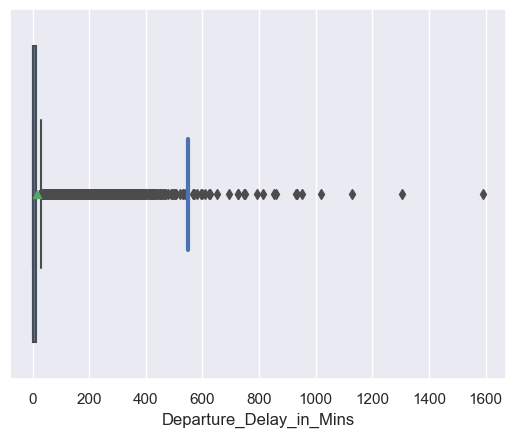

In [36]:
sns.boxplot(x = complete_encoded_df['Departure_Delay_in_Mins'] , showmeans=True, orient=90)
plt.plot([550]*5, [-0.15,0,0.1,0.1,0.15], linewidth=3)
plt.show()

In [39]:
col = 'Arrival_Delay_in_Mins' #500
complete_encoded_df[ complete_encoded_df[col] > 500]#.head()#.index

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
4668,98804669,0,2.0,1,2.0,NaN,3.0,2.0,2.0,2.0,...,1.0,2.0,0.0,0.0,35.0,NaN,1,3907,569.0,543.0
6952,98806953,0,1.0,0,5.0,0.0,3.0,0.0,1.0,1.0,...,4.0,1.0,1.0,1.0,33.0,1.0,1,2832,726.0,691.0
7111,98807112,0,2.0,0,5.0,2.0,4.0,2.0,1.0,1.0,...,4.0,1.0,1.0,1.0,64.0,1.0,1,3794,570.0,567.0
7650,98807651,1,3.0,1,3.0,3.0,3.0,4.0,4.0,4.0,...,3.0,4.0,0.0,1.0,43.0,0.0,0,3882,624.0,615.0
12755,98812756,0,2.0,0,2.0,2.0,3.0,2.0,4.0,NaN,...,3.0,2.0,0.0,1.0,47.0,NaN,1,3113,1592.0,1584.0
20648,98820649,0,1.0,0,5.0,2.0,1.0,2.0,2.0,2.0,...,4.0,2.0,1.0,1.0,14.0,1.0,1,2103,519.0,516.0
22845,98822846,0,2.0,0,5.0,2.0,2.0,2.0,1.0,1.0,...,3.0,1.0,NaN,NaN,8.0,1.0,1,3017,1128.0,1115.0
26855,98826856,0,3.0,0,4.0,4.0,4.0,3.0,3.0,3.0,...,4.0,3.0,0.0,1.0,53.0,0.0,0,4198,930.0,952.0
27510,98827511,0,2.0,1,NaN,1.0,1.0,2.0,2.0,2.0,...,4.0,2.0,0.0,1.0,42.0,0.0,0,2668,815.0,822.0
30723,98830724,1,4.0,0,5.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,1.0,1.0,47.0,0.0,0,3835,933.0,920.0


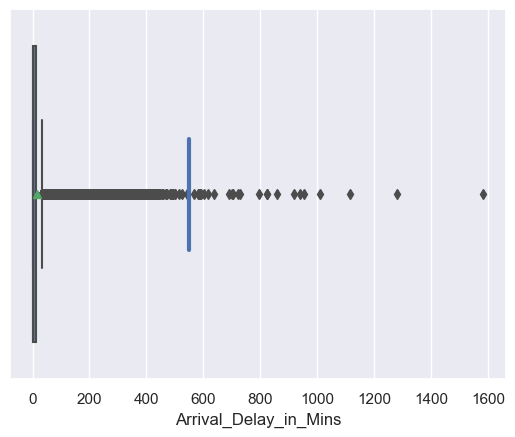

In [40]:
sns.boxplot(x = complete_encoded_df[col] , showmeans=True, orient=90)
plt.plot([550]*5, [-0.15,0,0.1,0.1,0.15], linewidth=3)
plt.show()

### List of Indexes that have Categories who have OUTLIERS are:

In [41]:
index1 = complete_encoded_df[ complete_encoded_df['Onboard_Service'] < 1].index
index2 = complete_encoded_df[ complete_encoded_df['CheckIn_Service'] < 1].index
col = 'Travel_Distance'
index3 = complete_encoded_df[ complete_encoded_df[col] >6000].index
col = 'Departure_Delay_in_Mins' #550
index4 = complete_encoded_df[ complete_encoded_df[col] >550].index
col = 'Arrival_Delay_in_Mins' #500
index5 = complete_encoded_df[ complete_encoded_df[col] > 500].index

all_index_element = [elem_i for list_i in [index1, index2,index3 ,index4 ,index5] for elem_i in list_i]
all_index_element = np.unique(np.array(all_index_element))
len(all_index_element )

88

In [42]:
complete_encoded_df.shape

(94379, 25)

### DROPPING the ROWS who have OUTLIERS are:

In [43]:
train_df = complete_encoded_df.drop(index= all_index_element )
train_df.shape

(94291, 25)

### SAVING INTO A DIFFERENT DATAFRAME ALL the Remaining Rows

In [44]:
train_df.to_csv('training_dataset_ready_for_imputation.csv')

# Test Model union

In [144]:

csv_name2 = 'Surveydata_test.csv'
encoded_df2 = cleaning_Survey(csv_name2)

csv_name4 = 'Traveldata_test.csv'
encoded_df4 = cleaning_Travel(csv_name4)

encoded_df24 = pd.merge(encoded_df2, encoded_df4, on='ID')
encoded_df24.to_csv('test_dataset_ready.csv')